In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import pandas as pd
import os


 # Counting the number of files

In [2]:

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_daisy = "flower_photos/dataset/train/daisy"
train_files_dandelion = "flower_photos/dataset/train/dandelion"
train_files_roses = "flower_photos/dataset/train/roses"
train_files_sunflowers = "flower_photos/dataset/train/sunflowers"
train_files_tulips = "flower_photos/dataset/train/tulips"

valid_files_daisy = "flower_photos/dataset/valid/daisy"
valid_files_dandelion ="flower_photos/dataset/valid/dandelion"
valid_files_roses ="flower_photos/dataset/valid/roses"
valid_files_sunflowers = "flower_photos/dataset/valid/sunflowers"
valid_files_tulips ="flower_photos/dataset/valid/tulips"

test_files_daisy = "flower_photos/dataset/test/daisy"
test_files_dandelion = "flower_photos/dataset/test/dandelion"
test_files_roses = "flower_photos/dataset/test/roses"
test_files_sunflowers = "flower_photos/dataset/test/sunflowers"
test_files_tulips = "flower_photos/dataset/test/tulips"


print("Number of daisy flower images in training set", total_files(train_files_daisy))
print("Number of dandelion flower images in training set", total_files(train_files_dandelion))
print("Number of roses images in training set", total_files(train_files_roses))
print("Number of sunflowers images in training set", total_files(train_files_sunflowers))
print("Number of tulips flower images in training set", total_files(train_files_tulips))

print("========================================================")


print("Number of daisy flower images in validation set", total_files(valid_files_daisy))
print("Number of hdandelion flower images in validation set", total_files(valid_files_dandelion))
print("Number of roses images in validation set", total_files(valid_files_roses))
print("Number of sunflowers images in validation set", total_files(valid_files_sunflowers))
print("Number of tulips flower images in validation set", total_files(valid_files_tulips))

print("========================================================")

print("Number of daisy flower images in test set", total_files(test_files_daisy))
print("Number of dandelion flower images in test set", total_files(test_files_dandelion))
print("Number of roses images in test set", total_files(test_files_roses))
print("Number of sunflowers images in test set", total_files(test_files_sunflowers))
print("Number of tulips flower images in test set", total_files(test_files_tulips))


Number of daisy flower images in training set 430
Number of dandelion flower images in training set 717
Number of roses images in training set 513
Number of sunflowers images in training set 560
Number of tulips flower images in training set 640
Number of daisy flower images in validation set 101
Number of hdandelion flower images in validation set 92
Number of roses images in validation set 64
Number of sunflowers images in validation set 70
Number of tulips flower images in validation set 80
Number of daisy flower images in test set 102
Number of dandelion flower images in test set 89
Number of roses images in test set 64
Number of sunflowers images in test set 69
Number of tulips flower images in test set 79


# import keras

In [3]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory('flower_photos/dataset/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('flower_photos/dataset/valid',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 2860 images belonging to 5 classes.
Found 407 images belonging to 5 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input


model = Sequential()
model.add(Input(shape=(225, 225, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7807 - loss: 0.6136 - val_accuracy: 0.6437 - val_loss: 0.9629
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.7882 - loss: 0.5688 - val_accuracy: 0.6609 - val_loss: 1.0068
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8099 - loss: 0.5363 - val_accuracy: 0.6192 - val_loss: 1.0953
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8123 - loss: 0.4980 - val_accuracy: 0.6413 - val_loss: 1.2276
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.8209 - loss: 0.5006 - val_accuracy: 0.6437 - val_loss: 1.0495


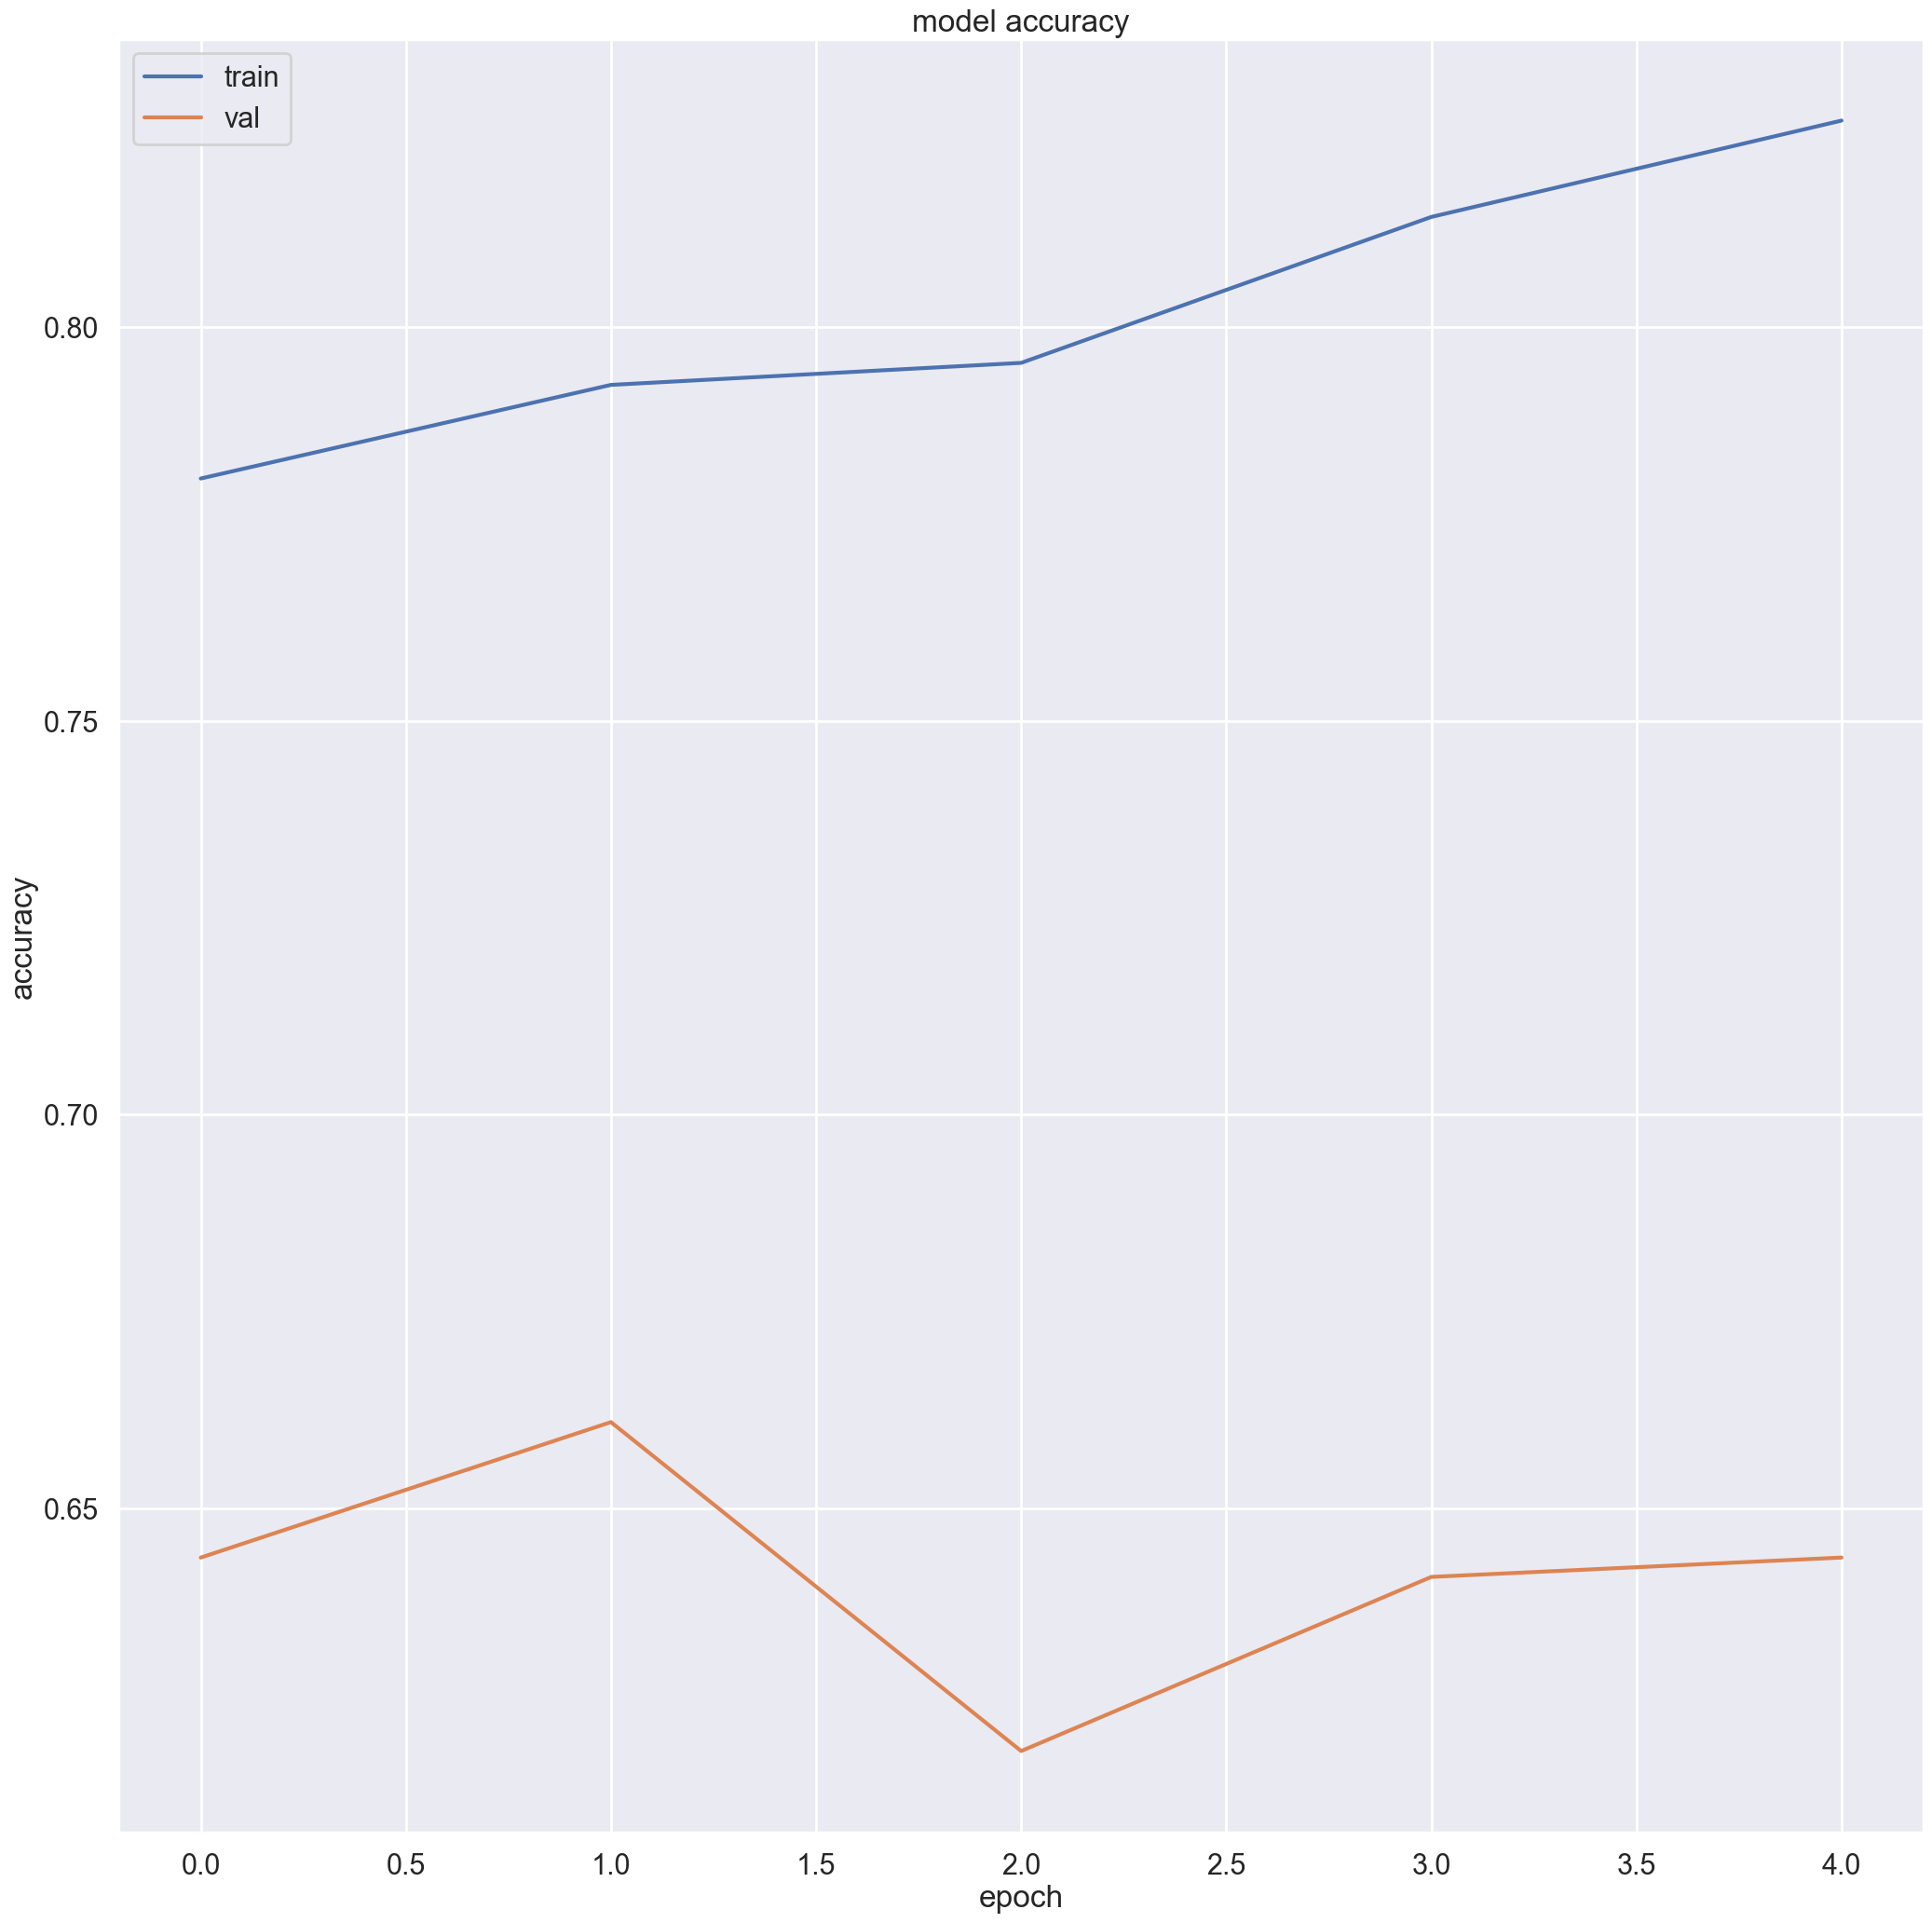

In [48]:
from matplotlib.pyplot import figure

sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
model.save("main_model2.h5")

In [52]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('flower_photos/dataset/test/tulips/16717320956_d4b00807f2.jpg')


In [53]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([5.5305508e-04, 1.5806536e-03, 2.8607042e-03, 9.9463958e-01,
       3.6603448e-04], dtype=float32)

In [54]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [55]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

sunflowers
